<a href="https://www.kaggle.com/code/kabilesh45/housing-prediction-competition?scriptVersionId=214452315" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


## Importing required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

## Reading the Data

In [3]:
train_df = pd.read_csv(r"/kaggle/input/home-data-for-ml-course/train.csv")
test_df = pd.read_csv(r"/kaggle/input/home-data-for-ml-course/test.csv")

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Calculating the missing percentage of all features

In [7]:
def missing_df(df):
    missing_df = pd.DataFrame(data = df.isnull().sum(), columns = ['count'])
    missing_df['percentage'] = missing_df['count'] / df.shape[0] * 100
    return missing_df

In [8]:
missing_train = missing_df(train_df)
max_null_train = missing_train[missing_train['percentage'] > 40].index
max_null_train

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [9]:
missing_test = missing_df(test_df)
max_null_test = missing_test[missing_test['percentage'] > 40].index
max_null_test

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

> Columns that contains data less that 40% are to be dropped from the dataset

In [10]:
train_df.drop(columns = max_null_train, inplace = True)
test_df.drop(columns = max_null_test, inplace = True)

In [11]:
train_df.shape, test_df.shape

((1460, 75), (1459, 74))

In [12]:
train_null = train_df.columns[train_df.isnull().sum()>0].to_list()
test_null = test_df.columns[test_df.isnull().sum()>0].to_list()
train_null,test_null

(['LotFrontage',
  'MasVnrArea',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Electrical',
  'GarageType',
  'GarageYrBlt',
  'GarageFinish',
  'GarageQual',
  'GarageCond'],
 ['MSZoning',
  'LotFrontage',
  'Utilities',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrArea',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinSF1',
  'BsmtFinType2',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  'BsmtFullBath',
  'BsmtHalfBath',
  'KitchenQual',
  'Functional',
  'GarageType',
  'GarageYrBlt',
  'GarageFinish',
  'GarageCars',
  'GarageArea',
  'GarageQual',
  'GarageCond',
  'SaleType'])

In [13]:
missing_train.loc[train_null]

,count,percentage
LotFrontage,259,17.739726
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493
GarageType,81,5.547945
GarageYrBlt,81,5.547945


In [14]:
missing_test.loc[test_null]

,count,percentage
MSZoning,4,0.274160
LotFrontage,227,15.558602
Utilities,2,0.137080
Exterior1st,1,0.068540
Exterior2nd,1,0.068540
MasVnrArea,15,1.028101
BsmtQual,44,3.015764
BsmtCond,45,3.084304
BsmtExposure,44,3.015764
BsmtFinType1,42,2.878684


In [15]:
def seperate_null_features(df, null_list):
    numerical = [col for col in null_list if df[col].dtype != 'O']
    categorical = [col for col in null_list if df[col].dtype == 'O']    
    return numerical, categorical

In [16]:
numerical_train_null, categorical_train_null = seperate_null_features(train_df, train_null)
numerical_train_null, categorical_train_null

(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'],
 ['BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Electrical',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'GarageCond'])

In [17]:
numerical_test_null, categorical_test_null = seperate_null_features(test_df, test_null)
numerical_test_null, categorical_test_null

(['LotFrontage',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  'BsmtFullBath',
  'BsmtHalfBath',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea'],
 ['MSZoning',
  'Utilities',
  'Exterior1st',
  'Exterior2nd',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'KitchenQual',
  'Functional',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'SaleType'])

## Handling missing values

#### Handling Numerical Features

> Training Dataset

In [18]:
for feature in numerical_train_null:
    mean_value = train_df[feature].mean()
    if train_df[feature].dtype in ['int64', 'float64']:
        train_df[feature] = train_df[feature].fillna(mean_value)
    # print(train_df[feature].dtype)
    print(f"Filled null values of columns {feature} with mean value {mean_value}")

Filled null values of columns LotFrontage with mean value 70.04995836802665
Filled null values of columns MasVnrArea with mean value 103.68526170798899
Filled null values of columns GarageYrBlt with mean value 1978.5061638868744


In [19]:
train_df[numerical_train_null].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

> Testing Dataset

In [20]:
for feature in numerical_test_null:
    mean_value = train_df[feature].mean()
    if test_df[feature].dtype in ['int64', 'float64']:
        test_df[feature] = test_df[feature].fillna(mean_value)
    # print(train_df[feature].dtype)
    print(f"Filled null values of columns {feature} with mean value {mean_value}")

Filled null values of columns LotFrontage with mean value 70.04995836802664
Filled null values of columns MasVnrArea with mean value 103.68526170798899
Filled null values of columns BsmtFinSF1 with mean value 443.6397260273973
Filled null values of columns BsmtFinSF2 with mean value 46.54931506849315
Filled null values of columns BsmtUnfSF with mean value 567.2404109589041
Filled null values of columns TotalBsmtSF with mean value 1057.4294520547944
Filled null values of columns BsmtFullBath with mean value 0.42534246575342466
Filled null values of columns BsmtHalfBath with mean value 0.057534246575342465
Filled null values of columns GarageYrBlt with mean value 1978.5061638868744
Filled null values of columns GarageCars with mean value 1.7671232876712328
Filled null values of columns GarageArea with mean value 472.9801369863014


In [21]:
test_df[numerical_test_null].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

#### Handling Categorical Features

> Training Dataset

In [22]:
for feature in categorical_train_null:
    if feature != 'Electrical':
        train_df[feature] = train_df[feature].fillna('None')
        print(f"Filled null values of columns {feature} with {'None'}")

    elif feature == 'Electrical':
        train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])
        print(f"Filled null values of columns {feature} with mode value {train_df[feature].mode()[0]}")

Filled null values of columns BsmtQual with None
Filled null values of columns BsmtCond with None
Filled null values of columns BsmtExposure with None
Filled null values of columns BsmtFinType1 with None
Filled null values of columns BsmtFinType2 with None
Filled null values of columns Electrical with mode value SBrkr
Filled null values of columns GarageType with None
Filled null values of columns GarageFinish with None
Filled null values of columns GarageQual with None
Filled null values of columns GarageCond with None


In [23]:
train_df[categorical_train_null].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

> Testing Dataset

In [24]:
for feature in categorical_test_null:
    if feature != 'Electrical':
        test_df[feature] = test_df[feature].fillna('None')
        print(f"Filled null values of columns {feature} with {'None'}")

    elif feature == 'Electrical':
        train_df['Electrical'] = test_df['Electrical'].fillna(train_df['Electrical'].mode()[0])
        print(f"Filled null values of columns {feature} with mode value {train_df[feature].mode()[0]}")

Filled null values of columns MSZoning with None
Filled null values of columns Utilities with None
Filled null values of columns Exterior1st with None
Filled null values of columns Exterior2nd with None
Filled null values of columns BsmtQual with None
Filled null values of columns BsmtCond with None
Filled null values of columns BsmtExposure with None
Filled null values of columns BsmtFinType1 with None
Filled null values of columns BsmtFinType2 with None
Filled null values of columns KitchenQual with None
Filled null values of columns Functional with None
Filled null values of columns GarageType with None
Filled null values of columns GarageFinish with None
Filled null values of columns GarageQual with None
Filled null values of columns GarageCond with None
Filled null values of columns SaleType with None


In [25]:
test_df[categorical_train_null].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

## Outlier Detection

In [26]:
skew_full = train_df.skew(numeric_only = True)
skew = skew_full[abs(skew_full) > 1]
skew_col = skew.index
skew_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

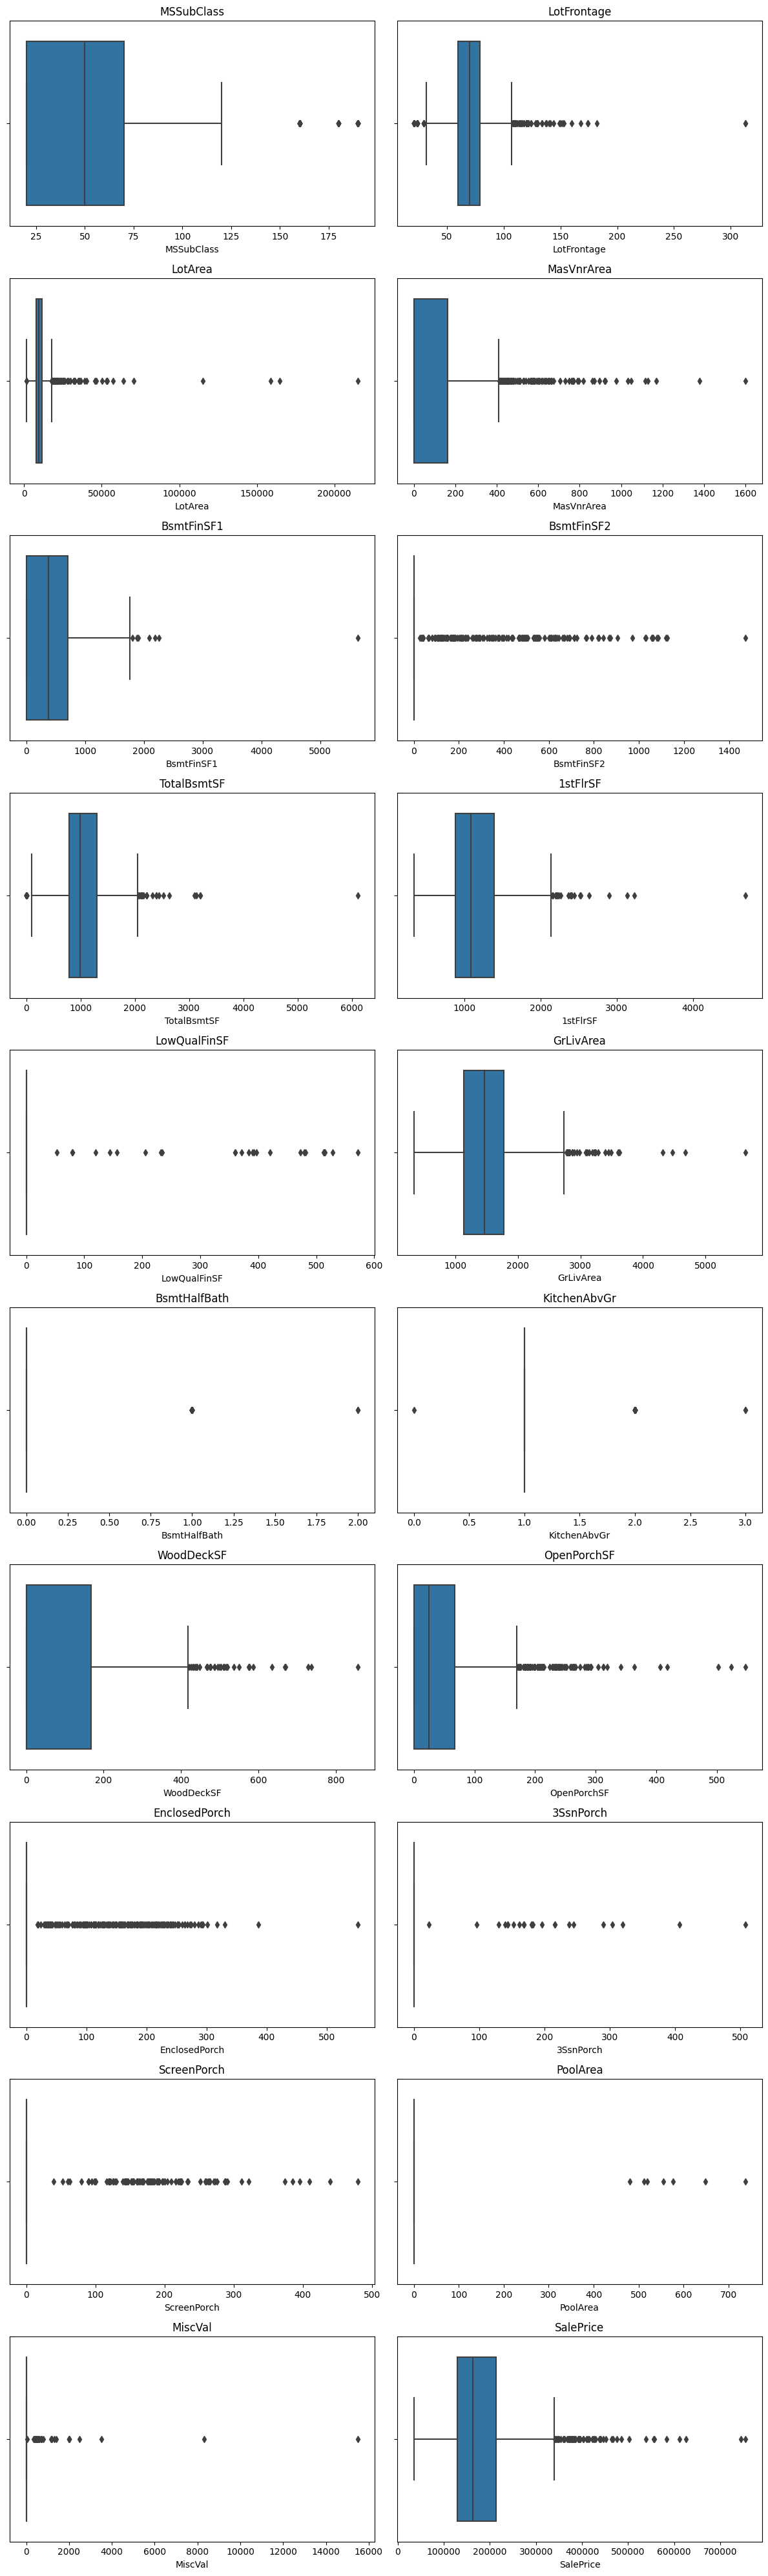

In [27]:
fig, axes = plt.subplots(10, 2, figsize = (12, skew.shape[0] * 2))
axes = axes.flatten()
for idx, col in enumerate(skew_col):
    ax = axes[idx]
    sns.boxplot(data = train_df, x = col, ax = ax)
    ax.set_title(col)
plt.tight_layout()

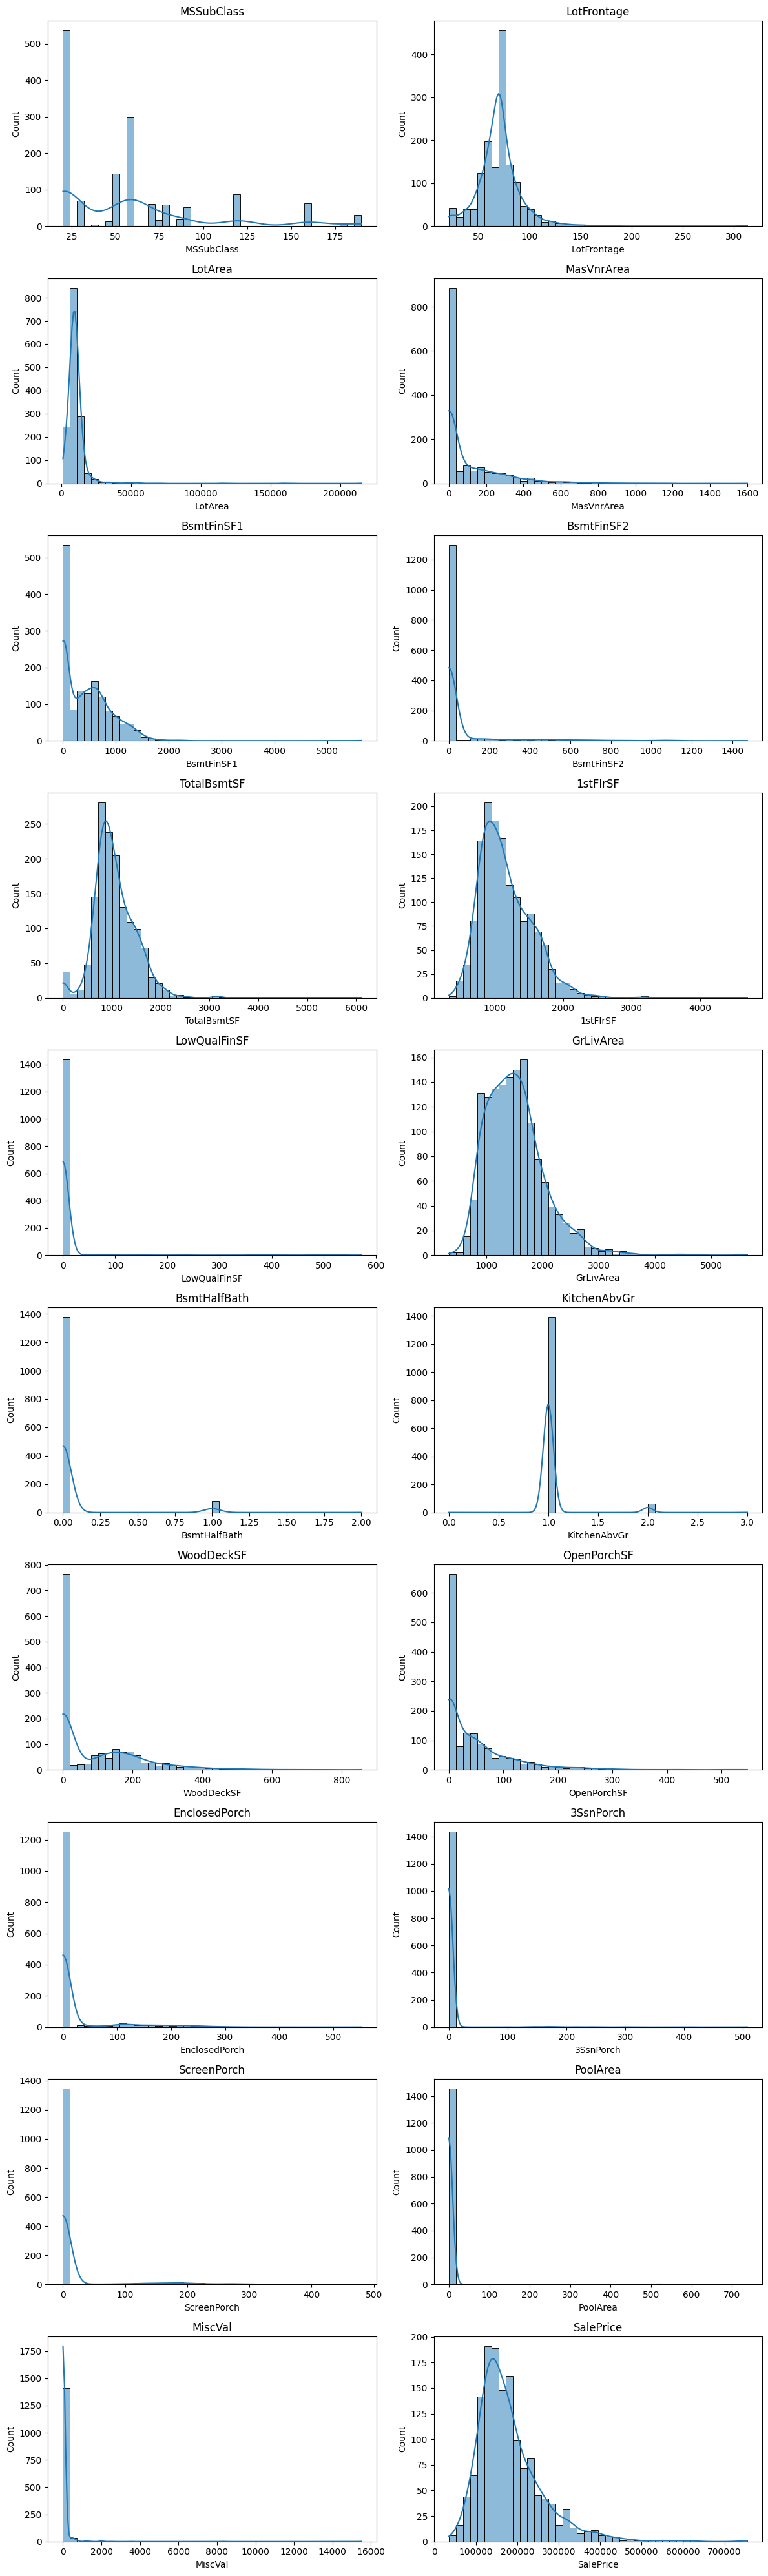

In [28]:
fig, axes = plt.subplots(10,2, figsize = (12, skew.shape[0] * 2))
axes = axes.flatten()
for idx, col in enumerate(skew_col):
    ax = axes[idx]
    sns.histplot(data = train_df, x = col, bins = 42, ax = ax, kde = True)
    ax.set_title(col)
# plt.suptitle('Skewness of Features in Dataset',fontsize=16, y=0.92)
plt.tight_layout()


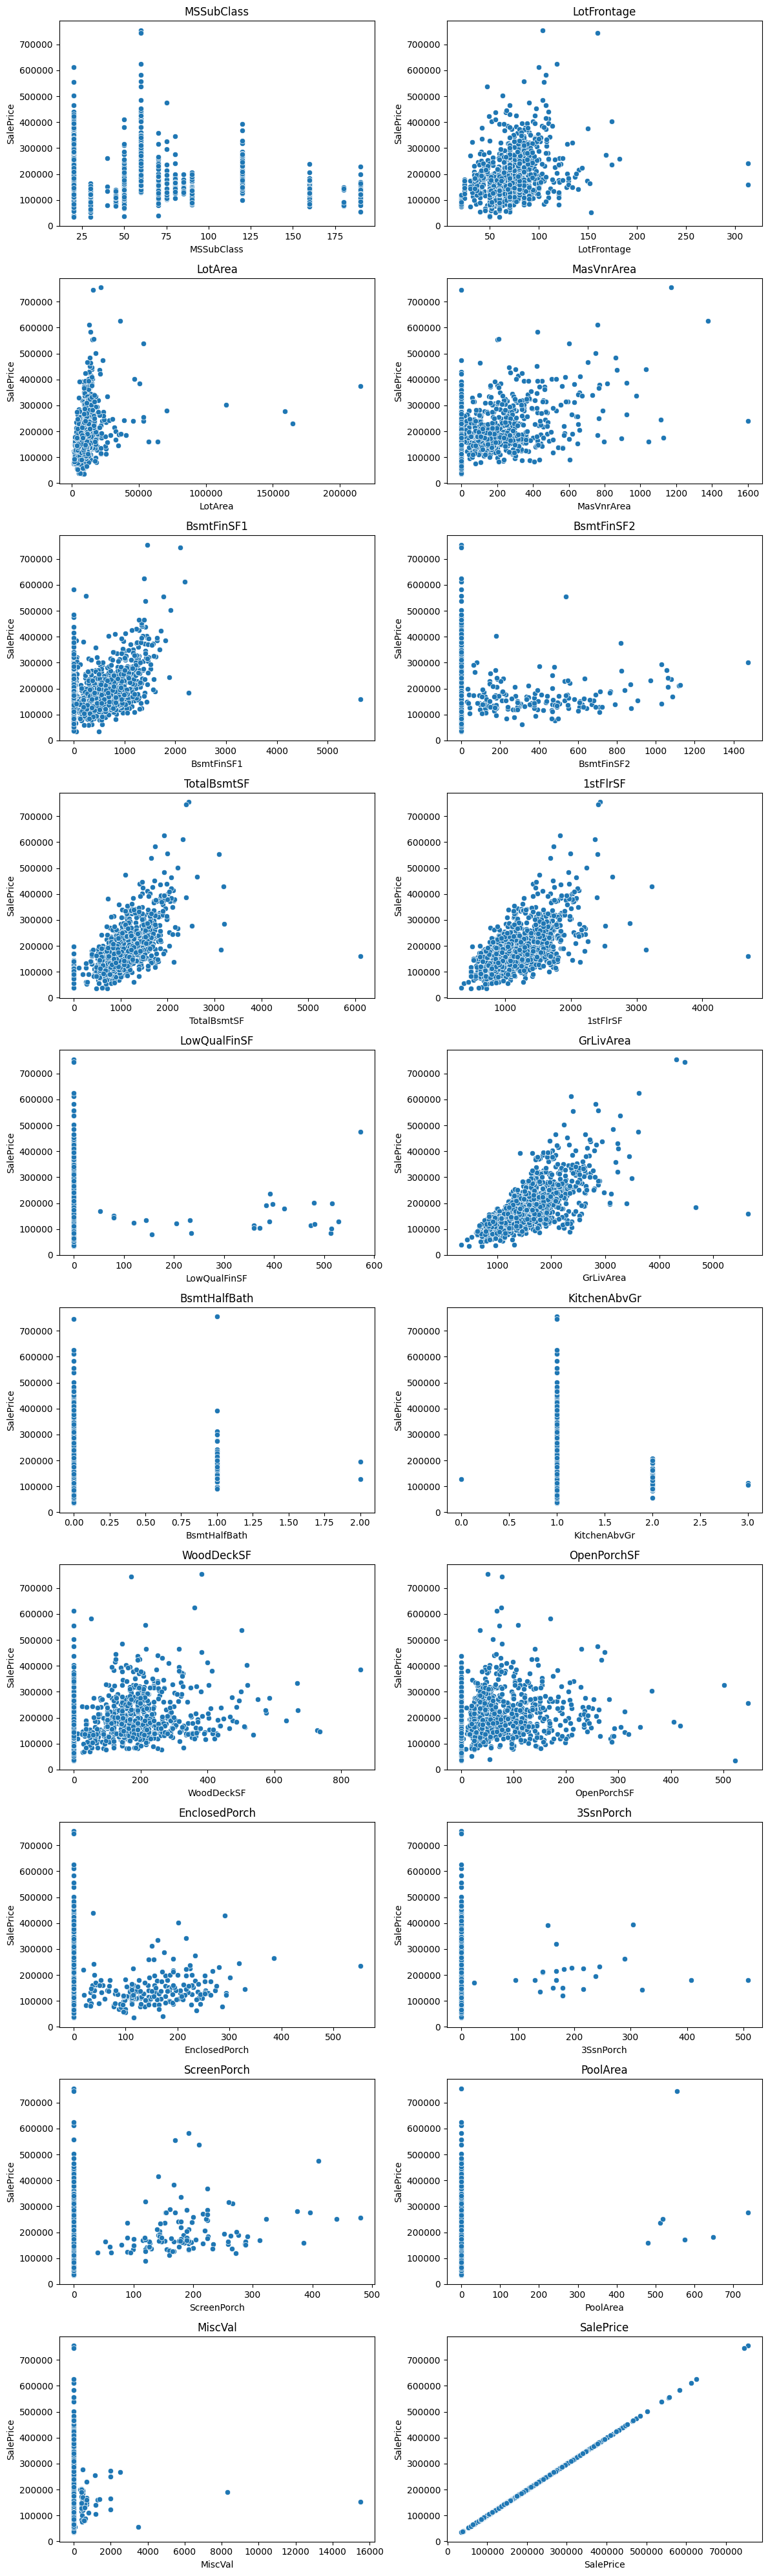

In [29]:
fig, axes = plt.subplots(10, 2, figsize = (12, skew.shape[0] * 2))
axes = axes.flatten()
for idx, col in enumerate(skew_col):
    ax = axes[idx]
    sns.scatterplot(data = train_df, x = col, y = 'SalePrice', ax = ax)
    ax.set_title(col)
plt.tight_layout()

<Axes: >

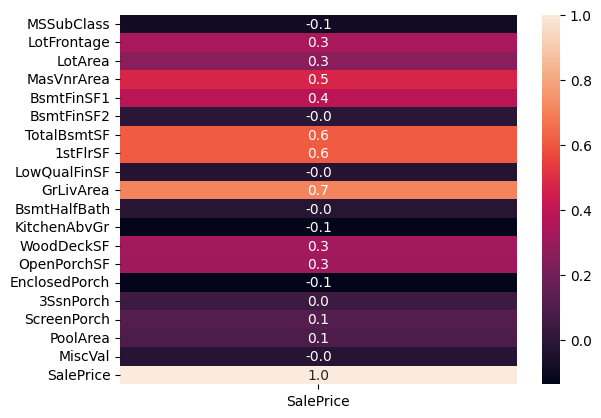

In [30]:
sns.heatmap(data = train_df[skew.index].corr()[['SalePrice']], annot = True, fmt = '.1f')

In [31]:
def limit(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    return upper_limit, lower_limit

In [32]:
def capping(df, col):
    upper_bound, lower_bound = limit(df, col)
    print(f'Feature: {col}\nUpper Bound: {upper_bound}\tLower Bound: {lower_bound}\n')
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    

In [33]:
for i in skew_col:
    capping(train_df, i)

Feature: MSSubClass
Upper Bound: 145.0	Lower Bound: -55.0

Feature: LotFrontage
Upper Bound: 107.5	Lower Bound: 31.5

Feature: LotArea
Upper Bound: 17673.5	Lower Bound: 1481.5

Feature: MasVnrArea
Upper Bound: 410.625	Lower Bound: -246.375

Feature: BsmtFinSF1
Upper Bound: 1780.625	Lower Bound: -1068.375

Feature: BsmtFinSF2
Upper Bound: 0.0	Lower Bound: 0.0

Feature: TotalBsmtSF
Upper Bound: 2052.0	Lower Bound: 42.0

Feature: 1stFlrSF
Upper Bound: 2155.125	Lower Bound: 118.125

Feature: LowQualFinSF
Upper Bound: 0.0	Lower Bound: 0.0

Feature: GrLivArea
Upper Bound: 2747.625	Lower Bound: 158.625

Feature: BsmtHalfBath
Upper Bound: 0.0	Lower Bound: 0.0

Feature: KitchenAbvGr
Upper Bound: 1.0	Lower Bound: 1.0

Feature: WoodDeckSF
Upper Bound: 420.0	Lower Bound: -252.0

Feature: OpenPorchSF
Upper Bound: 170.0	Lower Bound: -102.0

Feature: EnclosedPorch
Upper Bound: 0.0	Lower Bound: 0.0

Feature: 3SsnPorch
Upper Bound: 0.0	Lower Bound: 0.0

Feature: ScreenPorch
Upper Bound: 0.0	Lower Bound

In [34]:
train_df[skew_col].skew()

MSSubClass       1.019624
LotFrontage      0.061947
LotArea          0.208492
MasVnrArea       1.281293
BsmtFinSF1       0.739877
BsmtFinSF2       0.000000
TotalBsmtSF      0.237240
1stFlrSF         0.664134
LowQualFinSF     0.000000
GrLivArea        0.593556
BsmtHalfBath     0.000000
KitchenAbvGr     0.000000
WoodDeckSF       1.083673
OpenPorchSF      1.136301
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
SalePrice        0.802786
dtype: float64

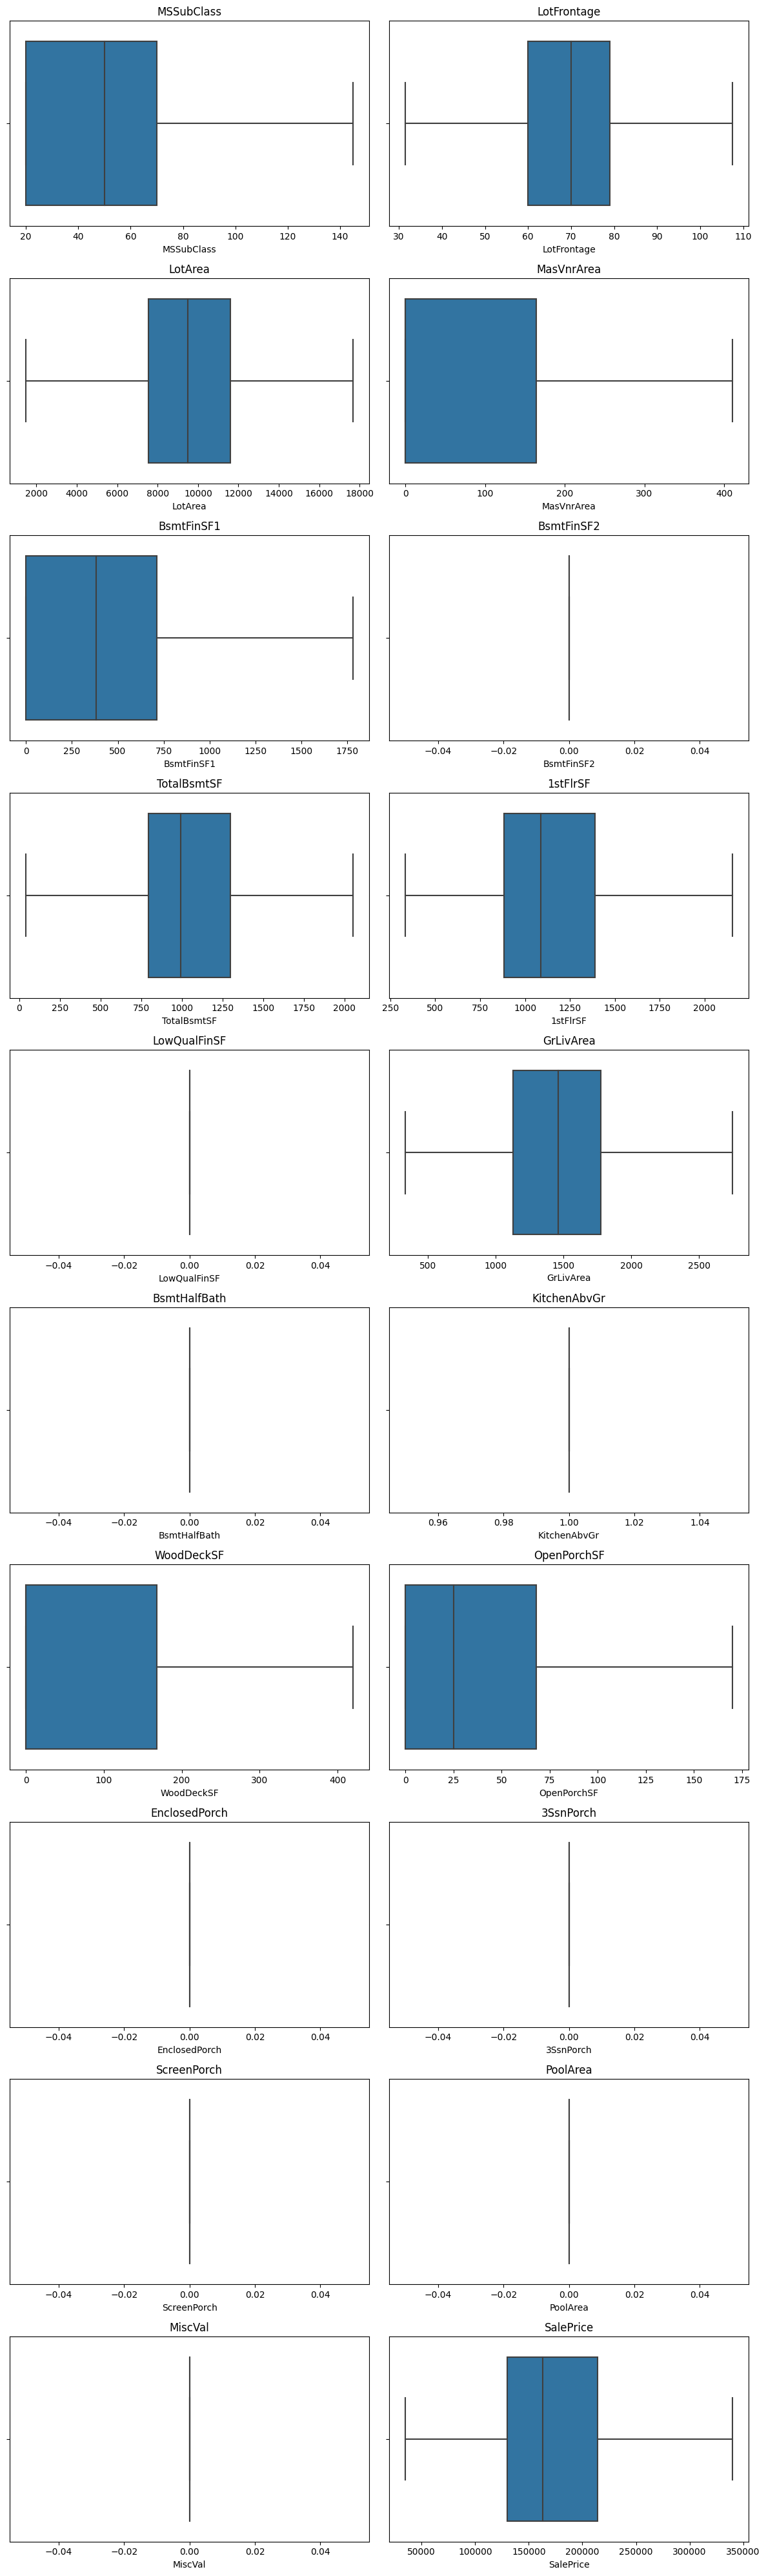

In [35]:
fig, axes = plt.subplots(10,2, figsize = (12, skew.shape[0] * 2))
axes = axes.flatten()
for idx, col in enumerate(skew_col):
    ax = axes[idx]
    sns.boxplot(data = train_df, x = col,ax = ax)
    ax.set_title(col)
# plt.suptitle('Skewness of Features in Dataset',fontsize=16, y=0.92)
plt.tight_layout()


<Axes: >

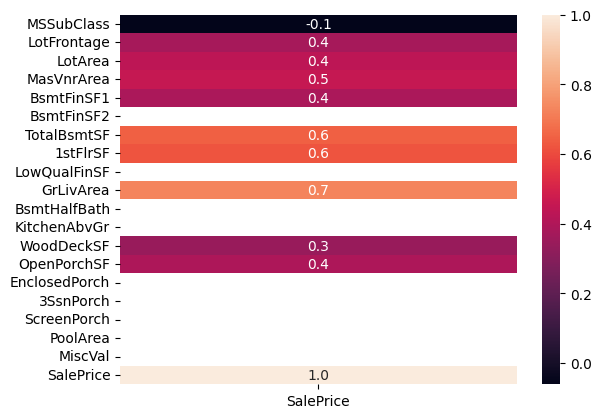

In [36]:
# sns.heatmap(data = train_df, x = skew_col, y = 'SalePrice')
sns.heatmap(data = train_df[skew_col].corr()[['SalePrice']], annot = True, fmt = '.1f')

## Encoding categorical variables

In [37]:
def seperate_features(df):
    numerical = [col for col in df.columns if df[col].dtype != 'O']
    categorical = [col for col in df.columns if df[col].dtype == 'O']    
    return numerical, categorical

In [38]:
categorical_col = [col for col in train_df.columns if train_df[col].dtype == 'O']
# categorical_col = train_df.select_dtypes(include = 'O').columns
categorical_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [39]:
train_df.describe(include = 'O').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260
Condition2,1460,8,Norm,1445


In [40]:
# train_df[categorical_col].nunique()
for col in categorical_col:
    print(col, ':', train_df[col].unique())

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : ['Pave' 'Grvl']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st : ['VinylSd' 'Meta

In [41]:
ordinal_col = ['LotShape',
               'LandSlope',
               'ExterQual',
               'ExterCond',
               'BsmtQual',
               'BsmtCond',
               'BsmtExposure',
               'BsmtFinType1',
               'BsmtFinType2',
               'HeatingQC',
               'GarageFinish',
               'GarageQual',
               'GarageCond',
               'PavedDrive']

In [42]:
binary_col = []
nominal_col = []

for col in set(categorical_col) - set(ordinal_col):
    unique = train_df[col].nunique()
    if unique == 2:
        binary_col.append(col)
    else:
        nominal_col.append(col)

In [43]:
assert sorted(categorical_col) == sorted(ordinal_col + binary_col + nominal_col)

In [44]:
print(f"Nominal Features: {nominal_col}\n \nBinominal Features : {binary_col} \n \nOrdinal Features: {ordinal_col}")

Nominal Features: ['LotConfig', 'HouseStyle', 'RoofStyle', 'Exterior2nd', 'Condition2', 'Foundation', 'KitchenQual', 'Exterior1st', 'LandContour', 'MSZoning', 'RoofMatl', 'Neighborhood', 'SaleType', 'Condition1', 'Functional', 'Electrical', 'BldgType', 'SaleCondition', 'GarageType', 'Heating']
 
Binominal Features : ['Utilities', 'CentralAir', 'Street'] 
 
Ordinal Features: ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']


In [45]:
ordinal_mappings = {
    'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'],  
    'LandSlope': ['Sev', 'Mod', 'Gtl'],       
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],     
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],   
    'BsmtQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  
    'BsmtCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  
    'BsmtExposure': ['None', 'No', 'Mn', 'Av', 'Gd'], 
    'BsmtFinType1': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], 
    'BsmtFinType2': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  
    'GarageFinish': ['None', 'Unf', 'RFn', 'Fin'],  
    'GarageQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  
    'GarageCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PavedDrive': ['N', 'P', 'Y']
}

In [46]:
# binary encoding
for col in binary_col:
    label = LabelEncoder()
    train_df[col] = label.fit_transform(train_df[col])
    test_df[col] = label.fit_transform(test_df[col])

In [47]:
train_df[binary_col]

,Utilities,CentralAir,Street
0,0,1,1
1,0,1,1
2,0,1,1
3,0,1,1
4,0,1,1
...,...,...,...
1455,0,1,1
1456,0,1,1
1457,0,1,1
1458,0,1,1


In [48]:
test_df[binary_col]

,Utilities,CentralAir,Street
0,0,1,1
1,0,1,1
2,0,1,1
3,0,1,1
4,0,1,1
...,...,...,...
1454,0,1,1
1455,0,1,1
1456,0,1,1
1457,0,1,1


In [49]:
# ordinal encoding
ordinal = OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_col])
ordinal.fit(train_df[ordinal_col])
ordinal_train_data = ordinal.transform(train_df[ordinal_col])

In [50]:
ordinal_test_data = ordinal.transform(test_df[ordinal_col])

In [51]:
train_df[ordinal_col] = ordinal_train_data.astype(int)
test_df[ordinal_col] = ordinal_test_data.astype(int)
train_df[ordinal_col]

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,GarageFinish,GarageQual,GarageCond,PavedDrive
0,3,2,3,2,4,3,1,6,1,4,2,3,3,2
1,3,2,2,2,4,3,4,5,1,4,2,3,3,2
2,2,2,3,2,4,3,2,6,1,4,2,3,3,2
3,2,2,2,2,3,4,1,5,1,3,1,3,3,2
4,2,2,3,2,4,3,3,6,1,4,2,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,2,2,2,4,3,1,1,1,4,2,3,3,2
1456,3,2,2,2,4,3,1,5,3,2,1,3,3,2
1457,3,2,4,3,3,4,1,6,1,4,2,3,3,2
1458,3,2,2,2,3,3,2,6,3,3,1,3,3,2


In [52]:
train_df[ordinal_col]

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,GarageFinish,GarageQual,GarageCond,PavedDrive
0,3,2,3,2,4,3,1,6,1,4,2,3,3,2
1,3,2,2,2,4,3,4,5,1,4,2,3,3,2
2,2,2,3,2,4,3,2,6,1,4,2,3,3,2
3,2,2,2,2,3,4,1,5,1,3,1,3,3,2
4,2,2,3,2,4,3,3,6,1,4,2,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,2,2,2,4,3,1,1,1,4,2,3,3,2
1456,3,2,2,2,4,3,1,5,3,2,1,3,3,2
1457,3,2,4,3,3,4,1,6,1,4,2,3,3,2
1458,3,2,2,2,3,3,2,6,3,3,1,3,3,2


In [53]:
test_df[ordinal_col]

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,GarageFinish,GarageQual,GarageCond,PavedDrive
0,3,2,2,2,3,3,1,3,2,2,1,3,3,2
1,2,2,2,2,3,3,1,5,1,2,1,3,3,2
2,2,2,2,2,4,3,1,6,1,3,3,3,3,2
3,2,2,2,2,3,3,1,6,1,4,3,3,3,2
4,2,2,3,2,4,3,1,5,1,4,2,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3,2,2,2,3,3,1,1,1,3,0,0,0,2
1455,3,2,2,2,3,3,1,3,1,2,1,3,3,2
1456,3,2,2,2,3,3,1,5,1,4,1,3,3,2
1457,3,2,2,2,4,3,3,6,1,2,0,0,0,2


In [54]:
# nominal encoding
nominal = OneHotEncoder(sparse_output=False, handle_unknown ='ignore', drop = 'first')
nominal.fit(train_df[nominal_col])
encoded_train_nominal = nominal.transform(train_df[nominal_col])
encoded_test_nominal = nominal.transform(test_df[nominal_col])
encoded_train_nominal_df = pd.DataFrame(data = encoded_train_nominal, columns = nominal.get_feature_names_out().tolist())
encoded_test_nominal_df = pd.DataFrame(data = encoded_test_nominal, columns = nominal.get_feature_names_out().tolist())
encoded_test_nominal_df

,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,LandContour_HLS,LandContour_Low,LandContour_Lvl,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [55]:
nominal.feature_names_in_.tolist()

['LotConfig',
 'HouseStyle',
 'RoofStyle',
 'Exterior2nd',
 'Condition2',
 'Foundation',
 'KitchenQual',
 'Exterior1st',
 'LandContour',
 'MSZoning',
 'RoofMatl',
 'Neighborhood',
 'SaleType',
 'Condition1',
 'Functional',
 'Electrical',
 'BldgType',
 'SaleCondition',
 'GarageType',
 'Heating']

In [56]:
train_df_copy = train_df.drop(columns = nominal_col + ['Id']).copy()
test_df_copy = test_df.drop(columns = nominal_col + ['Id']).copy()
final_train_df = pd.concat([train_df_copy, encoded_train_nominal_df], axis = 1)
final_test_df = pd.concat([test_df_copy, encoded_test_nominal_df], axis = 1)
final_train_df

,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,LandContour_HLS,LandContour_Low,LandContour_Lvl,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,60,65.0,8450.0,1,3,0,2,7,5,2003,2003,196.0,3,2,4,3,1,6,706.0,1,0,150,856,4,1,856.0,854,0,1710.0,1,0,2,1,3,1,8,0,2003.0,2,2,548,3,3,2,0,61,0,0,0,0,0,2,2008,208500.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,20,80.0,9600.0,1,3,0,2,6,8,1976,1976,0.0,2,2,4,3,4,5,978.0,1,0,284,1262,4,1,1262.0,0,0,1262.0,0,0,2,0,3,1,6,1,1976.0,2,2,460,3,3,2,298,0,0,0,0,0,0,

## Scaling

In [57]:
scaler = RobustScaler()
scaler.fit(final_train_df.drop(columns = 'SalePrice'))

RobustScaler()

In [58]:
scaler.transform(final_train_df.drop(columns = 'SalePrice'))
scaler.transform(final_test_df)

array([[-0.6       ,  0.5236864 ,  0.52952075, ...,  0.        ,
         0.        ,  0.        ],
       [-0.6       ,  0.57631798,  1.18292984, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2       ,  0.20789693,  1.0749753 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.6       ,  4.73421272,  2.59918478, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7       , -0.42368202,  0.23777174, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2       ,  0.20789693,  0.03668478, ...,  0.        ,
         0.        ,  0.        ]])

## Feature Selection

In [59]:
x_feature = final_train_df.drop(columns = ['SalePrice'])
y = final_train_df.SalePrice

In [60]:
# Fit the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_feature, y)

# Get feature importances
importance = model.feature_importances_

# Map to feature names
feature_names = x_feature.columns
feature_importance_dict = dict(zip(feature_names, importance))

# Rank features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Select top n features
top_n = 100
top_features = sorted_features[:top_n]
selected_features = [feature for feature, _ in top_features]

# Print the top features
print(f"Top {top_n} Features:")
print(selected_features)


Top 100 Features:
['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'BsmtFinSF1', 'GarageArea', '1stFlrSF', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'GarageFinish', 'OverallCond', 'BsmtQual', 'BsmtUnfSF', 'Fireplaces', 'OpenPorchSF', 'LotFrontage', 'GarageYrBlt', '2ndFlrSF', 'CentralAir', 'BsmtFinType1', 'WoodDeckSF', 'GarageType_Detchd', 'MoSold', 'MasVnrArea', 'Neighborhood_Edwards', 'GarageType_Attchd', 'BsmtExposure', 'MSSubClass', 'TotRmsAbvGrd', 'KitchenQual_Gd', 'MSZoning_RM', 'YrSold', 'LotShape', 'KitchenQual_TA', 'GarageCond', 'GarageQual', 'BedroomAbvGr', 'BsmtFullBath', 'ExterQual', 'FullBath', 'Exterior2nd_VinylSd', 'HalfBath', 'HeatingQC', 'ExterCond', 'MSZoning_RL', 'Neighborhood_CollgCr', 'LandSlope', 'LandContour_Lvl', 'Exterior1st_VinylSd', 'Neighborhood_Crawfor', 'SaleCondition_Normal', 'Functional_Typ', 'BsmtFinType2', 'PavedDrive', 'RoofStyle_Hip', 'RoofStyle_Gable', 'BsmtCond', 'SaleCondition_Family', 'SaleType_WD', 'Foundation_PConc', 'LotConfig_Inside', '

## Model Fit

#### Splitting data into training and validation sets


In [61]:
# Splitting data into training and validation sets
X = final_train_df[selected_features]
y = final_train_df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

> **Linear Regression**

In [62]:
# Create and train the Linear Regression lr
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred_lr = lr.predict(X_val)  # Predictions for validation data
mse_lr = mean_squared_error(y_val, y_val_pred_lr)
print("Mean Squared Error on Validation Set:", mse_lr)

# If you need to make predictions on test data (assuming `final_test_df` is processed correctly)
X_test = final_test_df[selected_features]  # Ensure the test set is preprocessed in the same way as X
y_test_pred_lr = lr.predict(X_test)
print("Test Predictions:", y_test_pred_lr[:10])  # Display first 10 predictions


Mean Squared Error on Validation Set: 427741747.00312793
Test Predictions: [ 99099.42713519 165467.76158681 182194.24081256 192434.51416655
 187154.24948907 172800.92787768 187301.11852461 160671.6073477
 201549.25351811 109916.01928409]


> **Random Forest**

In [63]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred_rf = rf.predict(X_val)  # Predictions for validation data
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
print("Mean Squared Error on Validation Set:", mse_rf)

# If you need to make predictions on test data (assuming `final_test_df` is processed correctly)
X_test = final_test_df[selected_features]  # Ensure the test set is preprocessed in the same way as X
y_test_pred_rf = rf.predict(X_test)
print("Test Predictions:", y_test_pred_rf[:10])  # Display first 10 predictions


Mean Squared Error on Validation Set: 410679927.6537051
Test Predictions: [125326.5  157141.   188244.78 185884.   205704.   184061.7  170553.14
 175131.84 185984.98 120706.66]


> XGBRegressor

In [64]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, subsample=0.8, random_state=42)
xgb_model.fit(X_train, y_train)
# Evaluate on validation set
y_val_pred_xgb = xgb_model.predict(X_val)  # Predictions for validation data
mse_xgb = mean_squared_error(y_val, y_val_pred_xgb)
print("Mean Squared Error on Validation Set:", mse_xgb)

# If you need to make predictions on test data (assuming `final_test_df` is processed correctly)
X_test = final_test_df[selected_features]  # Ensure the test set is preprocessed in the same way as X
y_test_pred_xgb = xgb_model.predict(X_test)
print("Test Predictions:", y_test_pred_xgb[:10])  # Display first 10 predictions
 

Mean Squared Error on Validation Set: 371787720.9242174
Test Predictions: [127430.586 162116.2   188900.17  190497.69  194903.08  177007.36
 179610.19  170712.55  175234.58  120218.2  ]


## Submission

In [65]:
submission = pd.DataFrame({
    'Id': X_test.index,
    'SalePrice': y_test_pred_xgb
})

submission.to_csv('submission.csv', index=False)


In [66]:
submission.head()

,Id,SalePrice
0,0,127430.585938
1,1,162116.203125
2,2,188900.171875
3,3,190497.687500
4,4,194903.078125
